# Exploratory analysis of stock prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dbejarano31/Master-Thesis-Information-Management/main/consolidated-data')
df.head()

,Unnamed: 0,CIK Code,Filing,Date Filed_x,Ticker,CompanyName,Previous close,Next Open
0,0,1364954,An investment in our securities involves a hig...,2021-02-27,CHGG,"CHEGG, INC",96.529999,95.870003
1,1,1738758,An investment in our securitiesis speculative ...,2020-09-14,GSMG,GLORY STAR NEW MEDIA GROUP HOLDINGS Ltd,3.010000,3.000000
2,2,1738758,An investment in our securitiesis speculative ...,2020-09-14,GSMG,GLORY STAR NEW MEDIA GROUP HOLDINGS Ltd,3.420000,3.600000
3,3,1674930,Investing in our common stock involves risk. B...,2020-08-12,FLGT,"Fulgent Genetics, Inc.",30.250000,30.610001
4,4,1422892,Beforeyou make a decision to invest in our sec...,2018-02-16,SINO,"Sino-Global Shipping America, Ltd.",2.020000,2.080000


In [3]:
df.drop(columns = 'Unnamed: 0', inplace = True)
df.head()

,CIK Code,Filing,Date Filed_x,Ticker,CompanyName,Previous close,Next Open
0,1364954,An investment in our securities involves a hig...,2021-02-27,CHGG,"CHEGG, INC",96.529999,95.870003
1,1738758,An investment in our securitiesis speculative ...,2020-09-14,GSMG,GLORY STAR NEW MEDIA GROUP HOLDINGS Ltd,3.010000,3.000000
2,1738758,An investment in our securitiesis speculative ...,2020-09-14,GSMG,GLORY STAR NEW MEDIA GROUP HOLDINGS Ltd,3.420000,3.600000
3,1674930,Investing in our common stock involves risk. B...,2020-08-12,FLGT,"Fulgent Genetics, Inc.",30.250000,30.610001
4,1422892,Beforeyou make a decision to invest in our sec...,2018-02-16,SINO,"Sino-Global Shipping America, Ltd.",2.020000,2.080000


The idea is to take a look at the average stock price trend for each of the stocks, and then compare whether the difference in closing prices is higher than the trend. If so, we can more robustly say that the effect of the filing caused a change in the stock prices. Otherwise, there would be really insignificant fluctuations in prices. 

## Preparing data

In [4]:
import yfinance as yf
import datetime

In [5]:
def get_stats(df, plot = False, tickers = None):
    """ This function retrieves a dataframe that contains the standard deviations and the mean
    of the stock prices for each of the tickers in the dataframe that contains the data.
    If plot = True, the stock prices are plotted for the tickers specified in the arguments.
    This is just a preliminary, very rudamentary way of calculating a significant deviation in
    the price of the stocks."""
    
    ticker_list = list(df['Ticker'])
    data = yf.download(tickers = ticker_list,
                      period = '3mo')
    
    names = []
    stds = []
    means = []
    q1 = []
    median = []
    q3 = []
    plot_data = {}
    fig, (ax, ax2) = plt.subplots(ncols = 2)
    
    #to collect base summary statistics to base our analysis upon
    for i in ticker_list:
        series = data['Adj Close']['{}'.format(i)]
        if i in tickers:
            plot_data['{}'.format(i)] = series.dropna()
            ax.plot(series, label = '{}'.format(i))
            ax.legend()
    
        names.append(i)
        stds.append(np.nanstd(np.array(series.values)))
        means.append(np.nanmean(np.array(series.values)))
        median.append(np.nanmedian(np.array(series.values)))
        q1.append(np.nanpercentile(np.array(series.values), 25))
        q3.append(np.nanpercentile(np.array(series.values), 75))
        

    if plot == True:
        index = []
        data_b = []
        for i, (key, val) in enumerate(plot_data.items()):
            index.append(key)
            data_b.append(val)
            
        ax2.boxplot(data_b)
        ax2.set_xticklabels(index)
        
    dic = {
        "Ticker": names,
        "Standard deviation": stds,
        "Mean price": means,
        "1st Quartile": q1,
        "Median": median,
        "3rd Quartile": q3
    }
    
    stats = pd.DataFrame(dic)
    plt.show()
    return stats


[*********************100%***********************]  119 of 119 completed

2 Failed downloads:
- AMRH: No data found, symbol may be delisted
- SOJA: No data found for this date range, symbol may be delisted


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1370: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


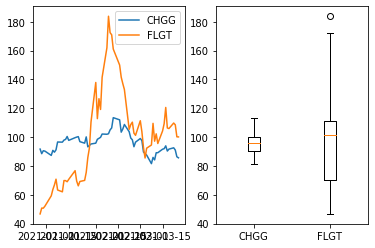

,Ticker,Standard deviation,Mean price,1st Quartile,Median,3rd Quartile
0,CHGG,6.706691,95.691311,90.57,95.820000,99.879997
1,GSMG,0.481242,3.512131,3.38,3.580000,3.890000
2,GSMG,0.481242,3.512131,3.38,3.580000,3.890000
3,FLGT,32.477940,100.180819,70.00,101.260002,111.379997
4,SINO,2.550481,5.832131,3.39,5.950000,7.990000


In [6]:
#test
exp1 = get_stats(df, plot = True, tickers = ["CHGG", "FLGT"])
exp1.head()

In [7]:
df = df.merge(exp1, on = "Ticker", how = "left")
df.head()

,CIK Code,Filing,Date Filed_x,Ticker,CompanyName,Previous close,Next Open,Standard deviation,Mean price,1st Quartile,Median,3rd Quartile
0,1364954,An investment in our securities involves a hig...,2021-02-27,CHGG,"CHEGG, INC",96.529999,95.870003,6.706691,95.691311,90.57,95.82,99.879997
1,1738758,An investment in our securitiesis speculative ...,2020-09-14,GSMG,GLORY STAR NEW MEDIA GROUP HOLDINGS Ltd,3.010000,3.000000,0.481242,3.512131,3.38,3.58,3.890000
2,1738758,An investment in our securitiesis speculative ...,2020-09-14,GSMG,GLORY STAR NEW MEDIA GROUP HOLDINGS Ltd,3.010000,3.000000,0.481242,3.512131,3.38,3.58,3.890000
3,1738758,An investment in our securitiesis speculative ...,2020-09-14,GSMG,GLORY STAR NEW MEDIA GROUP HOLDINGS Ltd,3.010000,3.000000,0.481242,3.512131,3.38,3.58,3.890000
4,1738758,An investment in our securitiesis speculative ...,2020-09-14,GSMG,GLORY STAR NEW MEDIA GROUP HOLDINGS Ltd,3.010000,3.000000,0.481242,3.512131,3.38,3.58,3.890000


## Determining robust ways to label filing effects

In [8]:
# to calculate the observed price change
price_delta = []

for i in range(len(df)):
    val = df['Next Open'][i] - df['Previous close'][i]
    price_delta.append(val)
    
df.insert(9, 'Price change', price_delta)


,CIK Code,Filing,Date Filed_x,Ticker,CompanyName,Previous close,Next Open,Standard deviation,Mean price,Price change,1st Quartile,Median,3rd Quartile
0,1364954,An investment in our securities involves a hig...,2021-02-27,CHGG,"CHEGG, INC",96.529999,95.870003,6.706691,95.691311,-0.659996,90.57,95.82,99.879997
1,1738758,An investment in our securitiesis speculative ...,2020-09-14,GSMG,GLORY STAR NEW MEDIA GROUP HOLDINGS Ltd,3.010000,3.000000,0.481242,3.512131,-0.010000,3.38,3.58,3.890000
2,1738758,An investment in our securitiesis speculative ...,2020-09-14,GSMG,GLORY STAR NEW MEDIA GROUP HOLDINGS Ltd,3.010000,3.000000,0.481242,3.512131,-0.010000,3.38,3.58,3.890000
3,1738758,An investment in our securitiesis speculative ...,2020-09-14,GSMG,GLORY STAR NEW MEDIA GROUP HOLDINGS Ltd,3.010000,3.000000,0.481242,3.512131,-0.010000,3.38,3.58,3.890000
4,1738758,An investment in our securitiesis speculative ...,2020-09-14,GSMG,GLORY STAR NEW MEDIA GROUP HOLDINGS Ltd,3.010000,3.000000,0.481242,3.512131,-0.010000,3.38,3.58,3.890000


In [10]:
df.drop_duplicates(subset = 'Ticker', keep = 'last', inplace = True)
df.reset_index(inplace = True)
df.drop(columns = 'index', inplace = True)
df.head()

,CIK Code,Filing,Date Filed_x,Ticker,CompanyName,Previous close,Next Open,Standard deviation,Mean price,Price change,1st Quartile,Median,3rd Quartile
0,1364954,An investment in our securities involves a hig...,2021-02-27,CHGG,"CHEGG, INC",96.529999,95.870003,6.706691,95.691311,-0.659996,90.570000,95.820000,99.879997
1,1674930,Investing in our common stock involves risk. B...,2020-08-12,FLGT,"Fulgent Genetics, Inc.",30.250000,30.610001,32.477940,100.180819,0.360001,70.000000,101.260002,111.379997
2,1236275,Investment in any securities offered pursuant ...,2020-10-01,SSNT,"SilverSun Technologies, Inc.",3.470000,3.700000,1.439795,5.315574,0.230000,4.160000,5.480000,6.550000
3,920522,The Issuer may need to refinance all or a port...,2021-02-27,ESS,"ESSEX PROPERTY TRUST, INC.",302.910004,302.160004,17.819669,256.512245,-0.750000,239.610001,259.970001,270.130005
4,1679063,An investment in our securities involvesa high...,2021-01-22,CSSE,"Chicken Soup for the Soul Entertainment, Inc.",10.180000,10.575000,3.680928,25.277705,0.395000,23.570000,25.150000,27.490000


In [11]:
# we are going to clone our dataset 3 times to test how unbalanced the resulting datasets are
df_a = df
df_b = df

### Comparing standard deviation against observed price change

In [12]:
labels = []

for i in range(len(df_a)):
    if abs(df_a['Price change'][i]) > abs(df_a['Standard deviation'][i]):
        if df_a['Price change'][i] > 0:
            labels.append('increase')
        else:
            labels.append('decrease')
    else:
        labels.append('neutral')

In [13]:
len(labels)

119

In [14]:
df_a.insert(10, 'Label', labels)
df_a.head()

,CIK Code,Filing,Date Filed_x,Ticker,CompanyName,Previous close,Next Open,Standard deviation,Mean price,Price change,Label,1st Quartile,Median,3rd Quartile
0,1364954,An investment in our securities involves a hig...,2021-02-27,CHGG,"CHEGG, INC",96.529999,95.870003,6.706691,95.691311,-0.659996,neutral,90.570000,95.820000,99.879997
1,1674930,Investing in our common stock involves risk. B...,2020-08-12,FLGT,"Fulgent Genetics, Inc.",30.250000,30.610001,32.477940,100.180819,0.360001,neutral,70.000000,101.260002,111.379997
2,1236275,Investment in any securities offered pursuant ...,2020-10-01,SSNT,"SilverSun Technologies, Inc.",3.470000,3.700000,1.439795,5.315574,0.230000,neutral,4.160000,5.480000,6.550000
3,920522,The Issuer may need to refinance all or a port...,2021-02-27,ESS,"ESSEX PROPERTY TRUST, INC.",302.910004,302.160004,17.819669,256.512245,-0.750000,neutral,239.610001,259.970001,270.130005
4,1679063,An investment in our securities involvesa high...,2021-01-22,CSSE,"Chicken Soup for the Soul Entertainment, Inc.",10.180000,10.575000,3.680928,25.277705,0.395000,neutral,23.570000,25.150000,27.490000


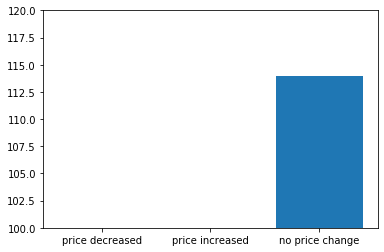

Price increased: 2 times
Price decreased: 3 times
Price did not change: 114 times


In [16]:
incr_counts = 0
neutral_counts = 0
decr_counts = 0

for i in df_a.Label:
    if i == 'neutral':
        neutral_counts += 1
    elif i == 'increase':
        incr_counts += 1

decr_counts = len(df_a) - (neutral_counts + incr_counts)
    
counts = [decr_counts, incr_counts, neutral_counts]
labels = ['price decreased', 'price increased', 'no price change']
plt.bar(labels, counts)
plt.ylim([0, 120])
plt.show()

print('Price increased: {} times'.format(incr_counts))
print('Price decreased: {} times'.format(decr_counts))
print('Price did not change: {} times'.format(neutral_counts))

Using the standard deviation to measure significant stock price deviations will yield an unbalanced dataset. 
Next approach ideas:
 * Calculate IQD and use it to determine outliers, if outlier then determine whether price increased or decreased.

### Outlier detection

#### Using IQD

In [20]:
df_b.drop(columns = 'Label', inplace = True)
df_b.head()

,CIK Code,Filing,Date Filed_x,Ticker,CompanyName,Previous close,Next Open,Standard deviation,Mean price,Price change,1st Quartile,Median,3rd Quartile
0,1364954,An investment in our securities involves a hig...,2021-02-27,CHGG,"CHEGG, INC",96.529999,95.870003,6.706691,95.691311,-0.659996,90.570000,95.820000,99.879997
1,1674930,Investing in our common stock involves risk. B...,2020-08-12,FLGT,"Fulgent Genetics, Inc.",30.250000,30.610001,32.477940,100.180819,0.360001,70.000000,101.260002,111.379997
2,1236275,Investment in any securities offered pursuant ...,2020-10-01,SSNT,"SilverSun Technologies, Inc.",3.470000,3.700000,1.439795,5.315574,0.230000,4.160000,5.480000,6.550000
3,920522,The Issuer may need to refinance all or a port...,2021-02-27,ESS,"ESSEX PROPERTY TRUST, INC.",302.910004,302.160004,17.819669,256.512245,-0.750000,239.610001,259.970001,270.130005
4,1679063,An investment in our securities involvesa high...,2021-01-22,CSSE,"Chicken Soup for the Soul Entertainment, Inc.",10.180000,10.575000,3.680928,25.277705,0.395000,23.570000,25.150000,27.490000


In [23]:
labels_b = []

for i in range(len(df_b)):
    iqr = df_b['3rd Quartile'][i] - df_b['1st Quartile'][i]
    if df_b['Next Open'][i] > (df_b['3rd Quartile'][i]+1.5*iqr):
        labels_b.append('increase')
    elif df_b['Next Open'][i] < (df_b['1st Quartile'][i] - 1.5*iqr):
        labels_b.append('decrease')
    else:
        labels_b.append('neutral')
            

['neutral',
 'neutral',
 'neutral',
 'neutral',
 'decrease',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'decrease',
 'decrease',
 'neutral',
 'neutral',
 'decrease',
 'decrease',
 'decrease',
 'decrease',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'decrease',
 'neutral',
 'increase',
 'decrease',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'decrease',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'decrease',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'increase',
 'increase',
 'neutral',
 'neutral',
 'decrease',
 'neutral',
 'decrease',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'increase',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'increase',
 'neutral'

In [26]:
df_b.insert(13, 'Label', labels_b)
df_b.head()

,CIK Code,Filing,Date Filed_x,Ticker,CompanyName,Previous close,Next Open,Standard deviation,Mean price,Price change,1st Quartile,Median,3rd Quartile,Label
0,1364954,An investment in our securities involves a hig...,2021-02-27,CHGG,"CHEGG, INC",96.529999,95.870003,6.706691,95.691311,-0.659996,90.570000,95.820000,99.879997,neutral
1,1674930,Investing in our common stock involves risk. B...,2020-08-12,FLGT,"Fulgent Genetics, Inc.",30.250000,30.610001,32.477940,100.180819,0.360001,70.000000,101.260002,111.379997,neutral
2,1236275,Investment in any securities offered pursuant ...,2020-10-01,SSNT,"SilverSun Technologies, Inc.",3.470000,3.700000,1.439795,5.315574,0.230000,4.160000,5.480000,6.550000,neutral
3,920522,The Issuer may need to refinance all or a port...,2021-02-27,ESS,"ESSEX PROPERTY TRUST, INC.",302.910004,302.160004,17.819669,256.512245,-0.750000,239.610001,259.970001,270.130005,neutral
4,1679063,An investment in our securities involvesa high...,2021-01-22,CSSE,"Chicken Soup for the Soul Entertainment, Inc.",10.180000,10.575000,3.680928,25.277705,0.395000,23.570000,25.150000,27.490000,decrease


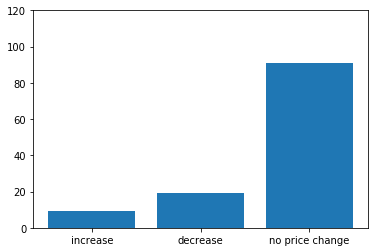

Price increased: 9 times
Price decreased: 19 times
Price did not move: 91 times


In [29]:
incr_counts_b = 0
decr_counts_b = 0
neutral_counts_b = 0
for i in df_b.Label:
    if i == 'increase':
        incr_counts_b += 1
    elif i == 'decrease':
        decr_counts_b += 1

neutral_counts_b = len(df_b) - (incr_counts_b + decr_counts_b)   

counts_b = [incr_counts_b, decr_counts_b, neutral_counts_b]
labels_b = ['increase', 'decrease','no price change']

plt.bar(labels_b, counts_b)
plt.ylim([0,120])
plt.show()

print('Price increased: {} times'.format(incr_counts_b))
print('Price decreased: {} times'.format(decr_counts_b))
print('Price did not move: {} times'.format(neutral_counts_b))


The dataset is still pretty unbalanced using the IQD to detect outliers.